In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
from search_env import MazeSearchEnv, MazeState
import heapdict

In [2]:
class SearchNode(object):
  def __init__(self, cost, action, predecessor, depth=0):
    self.cost = cost # cost until node
    self.action = action # action led to this state
    self.predecessor = predecessor # pred node
    self.depth = depth #depth in tree search
    
  def get_actions(self):
    actions = []
    node = self
    while node.predecessor:
      actions.insert(0, node.action)
      node = node.predecessor
    return actions

In [3]:
class Heuristic1(object):
    def __init__(self):
        self.val = 0
    
    def get_h(self, env, state):
        final_state = env.get_final_state()
        end_row, end_col = final_state.get_value()
        cur_row, cur_col = state.get_value()
        return (abs(end_row - cur_row) + abs(end_col - cur_col))

In [4]:
class WeightedAStarAgent(object):
    
    def __init__(self, env, weight, heuristic):
        self.env = env
        self.FAILURE = (-1, -1, -1)
        self.expanded = 0
        self.weight = weight
        self.heuristic = heuristic
        self.start_state = env.get_initial_state()
        
    def set_start_state(self, start_state = None):
        if start_state:
            self.start_state = start_state
        

    def run_search(self):
        self.expanded = 0
        start_node = SearchNode(0, None, None) # = (cost,action,predeccesor)
        open_nodes =  heapdict.heapdict()
        state = self.start_state
        # open[state id] = (f value, state object, state node)
        open_nodes[state.get_id()] = (self.__get_f_value(start_node, state), state, start_node)
        closed_nodes = {}

        while(open_nodes):
            #expand node
            _ , (current_f_val , current_state, current_node ) = open_nodes.popitem()

            # add to closed 
            closed_nodes[current_state.get_id()] = (current_state, current_f_val)
            
            # check if solution
            if self.env.is_final_state(current_state):
                print(current_state.get_value())
                return (current_node.get_actions(), current_node.cost, self.expanded)

            self.expanded += 1 
            
            # create successors 
            for action in self.env.get_legal_operators(current_state):
                next_state = self.env.get_next_state(current_state, action)
                cost = self.env.get_cost(current_state, action)
                next_node = SearchNode(cost + current_node.cost, action, current_node)
                
                #                
                next_state_f_val = self.__get_f_value(next_node, next_state)
                
                # node not seen
                if next_state.get_id() not in closed_nodes and not next_state.get_id() in open_nodes:
                  open_nodes[next_state.get_id()] = (next_state_f_val, 
                                                     next_state,
                                                     next_node)

                # seen but not developed yet
                elif next_state.get_id() in open_nodes:
                    seen_f_val = open_nodes[next_state.get_id()][0]
                    if next_state_f_val < seen_f_val:
                        # found better path to it
                        open_nodes[next_state.get_id()] = (next_state_f_val, 
                                                           next_state,
                                                           next_node)
                # in close
                else:
                    # get node from close
                    old_state, old_f = closed_nodes[next_state.get_id()]
                    if next_state_f_val < old_f:
                      # found better path
                      open_nodes[next_state.get_id()] = (next_state_f_val, 
                                                         next_state,
                                                         next_node)
                      closed_nodes.pop(next_state.get_id())


        return self.FAILURE # what to do if cant find?


    def __get_f_value(self, node, state):
        return self.heuristic.get_h(self.env, state)*self.weight + node.cost*(1-self.weight)


In [5]:
maze_env = MazeSearchEnv("./practice_maze.png")
a = WeightedAStarAgent(maze_env, 1 , Heuristic1())

In [6]:
actions, cost, expanded = a.run_search()

(1207, 641)


In [7]:
print(f"cost: {cost}")
print(f"expanded: {expanded}")

cost: 8348
expanded: 15790


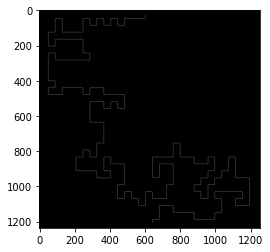

In [8]:
maze_env.color_maze_path_and_print(actions)

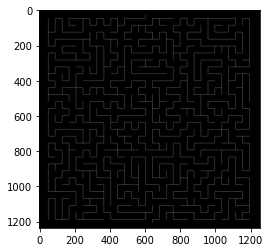

In [9]:
maze_env.print_maze()